<b>Machine Learning Exercise session: 23 September 2025</b>

# <b>Working with: LDA and QDA in good models</b>

Welcome to this week's exercise session. Today, we will learn about _LDA and QDA_. This notebook will take you through 
- Linear Discriminant Analysis (LDA)
- Quadratic Discriminant Analysis (QDA)
- Classification

The exercises are structured in 3 sections (Theory-t, Application-a, Exploration-e). 

Here is a table to guide you through this sheet:

|To Do|Ex|
|----|--|
|First|t0, e1, a1|
|Then|e2|
|Last|t1, t2|

Remember 
- It is good practice to use the Machine Learning python environment you made in week 1. *Ensure that you are working within the virtual environment (venv) with **conda activate ml**. where **ml** is the name of the venv, and/or selecting it on VSCode/Jupyter*
- Solving these exercises is supposed to take much longer than 90 minutes. Work on them before going to class.
- Learning Machine Learning is challenging. Take your time, make some errors, and read the documentation if needed. <b>We are happy to help if you are stuck.</b>
- **None of the exercises are mandatory, do your best to solve them! Every weekend solutions will be published!**
- *Remember to provide a Feedback on this Exercise sheet on the LearnIT page of the course so we can make an even better exercise session!*

Have fun! 

# <b>Exploring theoretical background</b>

# Exercise t0
***Disclaimer :** This exercise is made for you to get an intuition on the Loss matrix. In doing so, you are free to sketch on paper or to code your solution.*


In the **Section 1.5** in *Pattern Recognition and Machine Learning* by Christopher Bishop, you learned about the minimization of the average loss. 
From equation (1.80), assume 2 classes and a Gaussian conditional probability function. 
1. Write the expanded form of the average loss and reason on the meaning of each term, What do they mean?
    - *Hint:* Insert The 2x2 matrix
        $$
        L = \begin{bmatrix}
        L_{11} & L_{12} \\
        L_{21} & L_{22}
        \end{bmatrix}
        $$
        into 
        $$
        \mathbb{E}[L] = \sum_{k=1}^{2} \sum_{j=1}^{2} \int_{R_j} L_{kj} \, p(\mathbf{x}, C_k) \, d\mathbf{x}
        $$
        with 
        $$
        p(\mathbf{x} | C_k) = \frac{1}{\sqrt{2\pi \sigma_k^2}} \exp\left( -\frac{(\mathbf{x} - \mu_k)^2}{2\sigma_k^2} \right)
        $$
        to write out $\mathbb{E}[L]$ as explicit sum of four terms

In [56]:
# Solutions if needed

"""
The full function goes through 4 losses, where we compute the integral for each and uses the class conditionals.

If our loss is 0, then the integral will be 0 and with 1000 it penalizes higher.

"""

2. Given the specific Loss matrix

    $$
    L = \begin{bmatrix}
    1 & 100 \\
    2 & 0
    \end{bmatrix}
    $$

    and the following values for mean $\mu$, standard deviation $\sigma$, and prior probability $\pi$ for the two classes:

    - $\mu_1 = 0, \sigma_1 = 1, \pi_1 = 0.4$
    - $\mu_2 = 2, \sigma_2 = 1, \pi_2 = 0.6$

    Compute the average loss.

3. What does it symbolize?

In [ ]:
# Solutions if needed


# Exercise t1


During your first lecture on LDA and QDA (slide 19/29), the joint log-probability has been derived.
1. In preparation for the exam, you decide to derive it yourself as an exercise.

In [ ]:
# Solutions if needed

2. In doing so you realize that the assumption of same prior has been made (i.e. $\pi_k = \pi_l$).
3. Derive a general form for the decision boundary on $x$ when the prior are *NOT* the same. 
    - What effect does it have on the decision rule ($g_k - g_l$)?
    - More specifically: looking at your expression, how do the priors affect the decision boundary?

In [ ]:
# Solutions if needed

# Exercise t2

In the course book (*ISLwP pag.162*) the log-odds is derived for LDA using vector notation.
1. Derive the log-odds for the QDA (eq. 4.33).
2. Show that, if some conditions are satisfied, the QDA reduces to the LDA form.
    - What are these conditions?

In [57]:
# Solution if you want to code...   



""" 
ASsume conditions are that the covariance matrix are equal between the class conditionals and the means are different.

"""

# <b>Applying what you learned</b>

### Documentation

LIBRARIES AND METHODS EXPECTED TO BE USED:
- numpy : https://numpy.org/doc/stable/index
- pandas : https://pandas.pydata.org/pandas-docs/stable/
- matplotlib.pyplot : https://matplotlib.org/stable/tutorials/pyplot.html
- scipy.stats : https://docs.scipy.org/doc/scipy/tutorial/stats.html
- sklearn : https://sklearn.org/stable/getting_started.html
  - datasets : https://scikit-learn.org/stable/api/sklearn.datasets.html
  - linear_model : https://sklearn.org/stable/api/sklearn.linear_model.html
  - model_selection : https://sklearn.org/stable/api/sklearn.model_selection.html
  - metrics : https://scikit-learn.org/stable/api/sklearn.metrics.html

# Exercise a1

***Disclaimer:** As stated above, it's not expected to fully finish this exercise. There are multiple ways of approaching it. It is highly encouraged to go through the main points, reflecting on the meaning of classification.*

During late spring, at the Botanical Garden in Copenhagen, the blooming of **irises** takes place. Here are three species of the iris genus that have been labeled properly. How do you think is possible to *classify* these flowers? How would you do it?

![Iris_photos](iris_flower_dataset.png)

Turns out that in this case it can be done by analyzing length and width of **petals and sepals**.

![Flower_Power](iris_flower_sepal_and_petal.png)

1. Inspect the dataset using a pairplot
2. Plot the variation of the different species across the four properties (length-width for sepal-petal)
    - *hint:* Remember the boxplots
3. Train LDA and QDA to predict the correct classification on the test dataset.
    - EXTRA: Use a third model of your choice
4. Plot/Print the confusion matrix for each model. What do you conclude?
5. Print accuracy and sensitivity. How do the models perform?

[np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

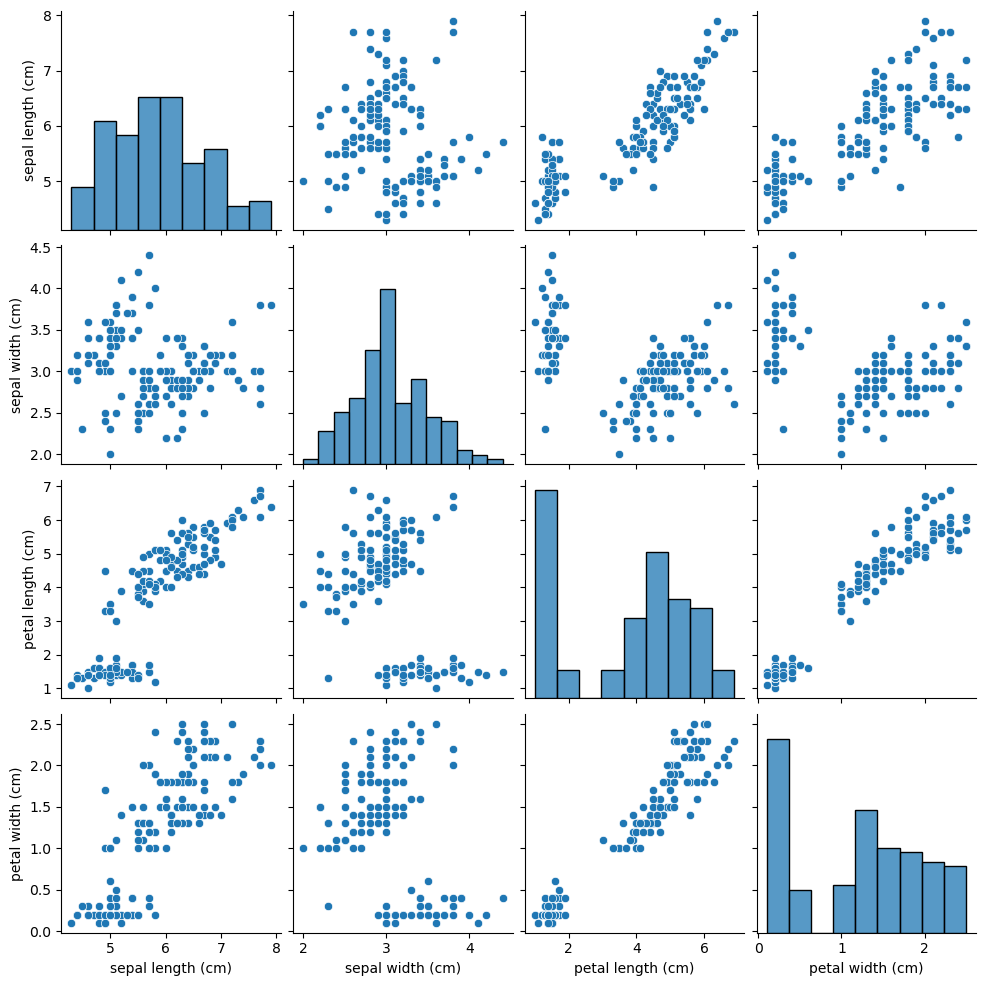

In [21]:
#Solution

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB

#Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')
target_names = iris.target_names

#Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


sns.pairplot(X)
list(target_names)

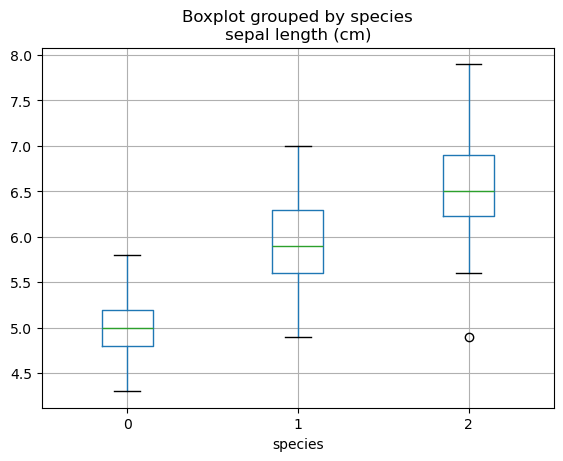

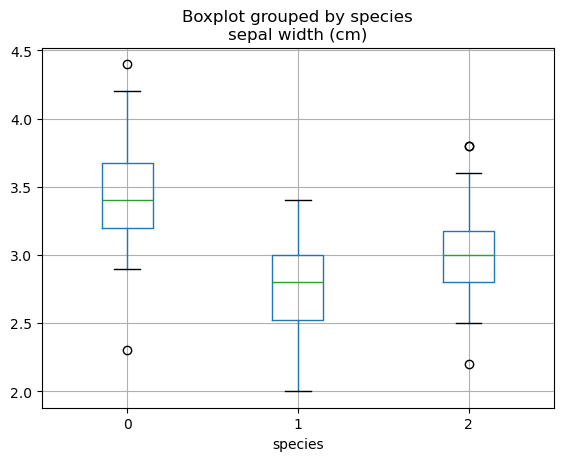

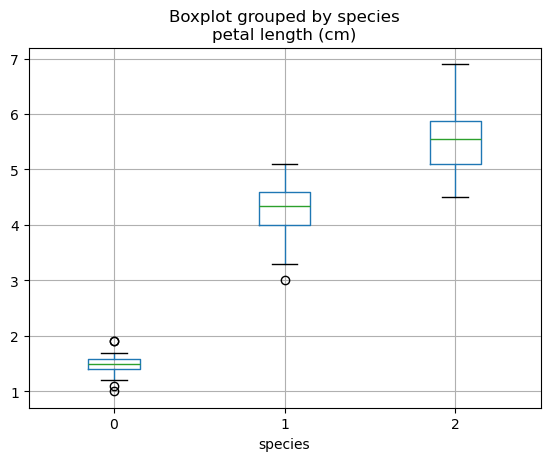

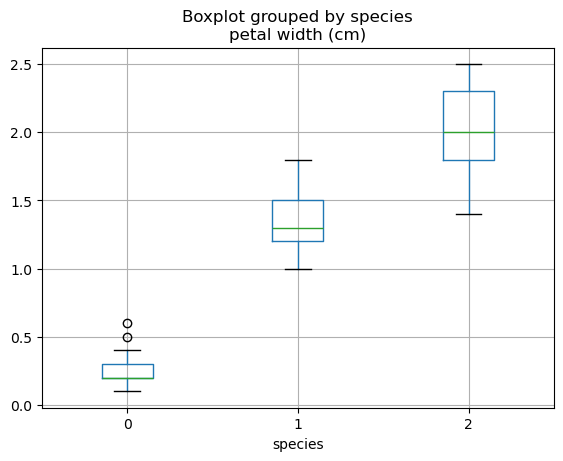

In [75]:

df = pd.concat([X, y], axis=1)

for feature in X.columns:
    df.boxplot(column=feature, by='species')


In [26]:
""" 
3. Train LDA and QDA to predict the correct classification on the test dataset.
    - EXTRA: Use a third model of your choice
4. Plot/Print the confusion matrix for each model. What do you conclude?
5. Print accuracy and sensitivity. How do the models perform?
"""
LDA_model = LDA()
QDA_model = QDA()
Naive_bayes = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded, test_size=0.25)

LDA_model.fit(X_train,y_train)

y_pred = LDA_model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


[[11  0  0]
 [ 0 12  2]
 [ 0  0 13]]
0.9473684210526315


In [29]:
QDA_model.fit(X_train,y_train)
y_qda_pred = QDA_model.predict(X_test)
print(confusion_matrix(y_test,y_qda_pred))
print(accuracy_score(y_test,y_qda_pred))
print(classification_report(y_test,y_qda_pred))

[[11  0  0]
 [ 0 12  2]
 [ 0  0 13]]
0.9473684210526315
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.86      0.92        14
           2       0.87      1.00      0.93        13

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [34]:
Naive_bayes.fit(X_train, y_train)
y_bayes_pred = Naive_bayes.predict(X_test)
print(confusion_matrix(y_test,y_bayes_pred))
print(accuracy_score(y_test,y_bayes_pred))
print(classification_report(y_test,y_bayes_pred))

[[11  0  0]
 [ 0 13  1]
 [ 0  2 11]]
0.9210526315789473
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.87      0.93      0.90        14
           2       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.93      0.92      0.93        38
weighted avg       0.92      0.92      0.92        38



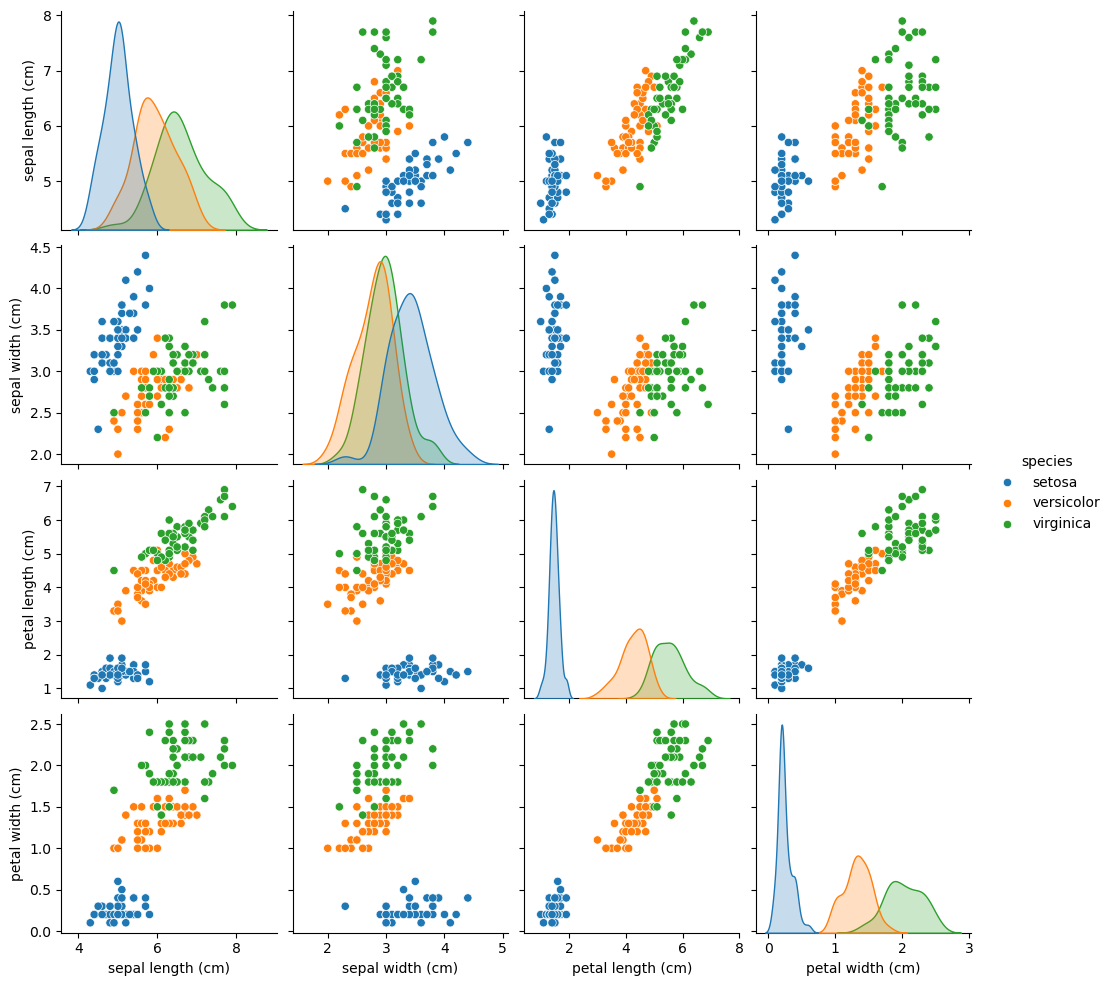

In [33]:
df = pd.concat([X, y], axis=1)
df['species'] = df['species'].map({i: name for i, name in enumerate(target_names)})

sns.pairplot(df, hue='species')
plt.show()

# <b>Exploring what you learned</b>

# Exercise e1



In **Section 1.5** in *Pattern Recognition and Machine Learning* by Christopher Bishop, Figure 1.24 on page 40, there is a clear picture of how the decision boundary affects the miclassification.

1. Using the following code as a guide, plot the distributions.
2. Try moving the x_current to see how it affects the regions defined in the book.

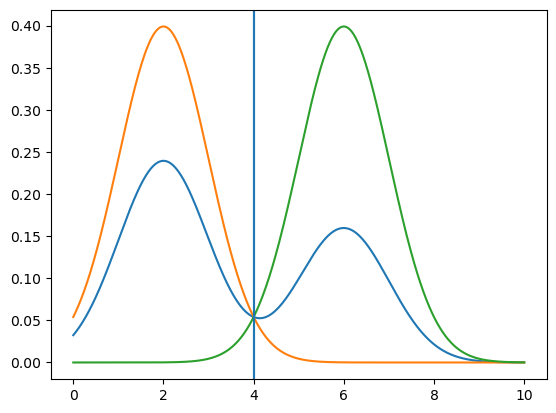

In [1]:
#Solution 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#Define the domain
x = np.linspace(0, 10, 1000)

#Define the Gaussian components for p(x | C1)
def p_x_given_C1(x, mu1, mu2, sigma):
   # Mixture of two Gaussians
   return 0.6 * norm.pdf(x, mu1, sigma) + 0.4 * norm.pdf(x, mu2, sigma)

#Define the Gaussian for p(x | C2)
def p_x_given_C2(x, mu2, sigma):
    return norm.pdf(x, mu2, sigma)

#Parameters for the distributions
mu1 = 2.0
mu2 = 6.0
sigma = 1.0
#Decision boundaries
x_optimal = 4.0  # optimal boundary
x_current = 4.0  # current boundary

plt.plot(x,p_x_given_C1(x,mu1,mu2,sigma))
plt.plot(x,p_x_given_C2(x,mu1,sigma))
plt.plot(x,p_x_given_C2(x, mu2, sigma))
plt.axvline(x= x_current)
plt.axvline(x= x_optimal)

#Unsatisfied by some examples, you decide to automize and refine the process.

3. Using the scipy quad function compute the colored area as in Figure 1.24
    - Docs: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html
    - *Hint:* The code below requires the right intervals!
    - How the area changes when changing the decision boundary?
    - What does that means?
4. EXTRA: Plot how the three coulored areas are changing when the x_current is moved across the whole distribution (i.e. from 0 to 10)

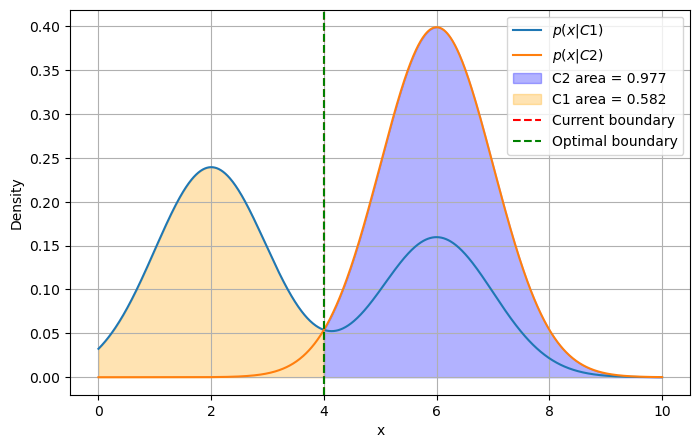

In [2]:
# Solution
from scipy.integrate import quad

tot, _ =quad(p_x_given_C2, x_current, 10, args=(mu2, sigma))
tut, _ =quad(p_x_given_C1, 0, x_current, args=(mu1, mu2, sigma))
tot


plt.figure(figsize=(8,5))
plt.plot(x, p_x_given_C1(x, mu1, mu2, sigma), label=r'$p(x|C1)$')
plt.plot(x, p_x_given_C2(x, mu2, sigma), label=r'$p(x|C2)$')

# Shade region for p(x|C2) from 4 to 10
x_fill = np.linspace(x_current, 10, 500)
plt.fill_between(x_fill,
                 p_x_given_C2(x_fill, mu2, sigma),
                 alpha=0.3, color='blue',
                 label=f'C2 area = {tot:.3f}')

# Shade region for p(x|C1) from 0 to x_current
x_fill = np.linspace(0, x_current, 500)
plt.fill_between(x_fill,
                 p_x_given_C1(x_fill, mu1, mu2, sigma),
                 alpha=0.3, color='orange',
                 label=f'C1 area = {tut:.3f}')

# Decision lines
plt.axvline(x=x_current, color='r', linestyle='--', label='Current boundary')
plt.axvline(x=x_optimal, color='g', linestyle='--', label='Optimal boundary')

plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Exercise e2


In the course book (*ISLwP pag.154 Figure 4.7*), the plot of how the error rate changes when changing probability threshold is presented for the *Default* dataset.
1. Produce at least two synthetic datasets using 'make_classification' using the code below as a guide.
2. Train LDA and QDA methods on all the datasets. How do they perform?
    - EXTRA: Try other two methods of your choice

In [60]:
#Solution: 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_gaussian_quantiles, make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


#Generate datasets
X_logistic, y_logistic = make_classification(n_samples=1000, n_features=2, n_informative=2,
                                              n_redundant=0, n_clusters_per_class=1, class_sep=0.5,
                                              flip_y=0.1, random_state=1)

X_linear, y_linear = make_classification(n_samples=1000, n_features=2, n_informative=2,
                                         n_redundant=0, n_clusters_per_class=1, class_sep=2.0,
                                         flip_y=0.0, random_state=2)

X_quadratic, y_quadratic = make_gaussian_quantiles(n_samples=1000, n_features=2, n_classes=2, random_state=3)

X_gaussian, y_gaussian = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=2.5, random_state=4)


X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, test_size=0.2)
LDA_model = LDA()
LDA_model.fit(X_train, y_train)
LDA_pred = LDA_model.predict(X_test)
Lda_acc = accuracy_score(y_test, LDA_pred)
error_logistic_LDA = 1-Lda_acc

QDA_model = QDA()
QDA_model.fit(X_train, y_train)
QDA_pred = QDA_model.predict(X_test)
QDA_acc = accuracy_score(y_test, QDA_pred)
error_logistic_QDA = 1-QDA_acc
Lda_acc, QDA_acc


(0.725, 0.83)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear, test_size=0.2)
LDA_model = LDA()
LDA_model.fit(X_train, y_train)
LDA_pred = LDA_model.predict(X_test)
Lda_acc = accuracy_score(y_test, LDA_pred)
error_linear_LDA = 1-Lda_acc

QDA_model = QDA()
QDA_model.fit(X_train, y_train)
QDA_pred = QDA_model.predict(X_test)
QDA_acc = accuracy_score(y_test, QDA_pred)
error_linear_QDA = 1-QDA_acc
Lda_acc, QDA_acc

(0.965, 0.98)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_quadratic, y_quadratic, test_size=0.2)
LDA_model = LDA()
LDA_model.fit(X_train, y_train)
LDA_pred = LDA_model.predict(X_test)
Lda_acc = accuracy_score(y_test, LDA_pred)
error_quadratic_LDA = 1-Lda_acc

QDA_model = QDA()
QDA_model.fit(X_train, y_train)
QDA_pred = QDA_model.predict(X_test)
QDA_acc = accuracy_score(y_test, QDA_pred)
error_quadratic_qda = 1-QDA_acc
Lda_acc, QDA_acc

(0.57, 0.965)

In [51]:

print("errors LDA:",error_logistic_LDA,error_linear_LDA,error_quadratic_LDA)
print("errors QDA:",error_logistic_QDA,error_linear_QDA,error_quadratic_qda)

errors LDA: 0.265 0.03500000000000003 0.43000000000000005
errors QDA: 0.19999999999999996 0.020000000000000018 0.03500000000000003


3. How would you compute the error rate?
4. Using the following function as a guide, plot the error rate againt the threshold for all the picked scenarios.
    - What do you notice?
    - Does it make sense? Why?

Text(0, 0.5, 'errors')

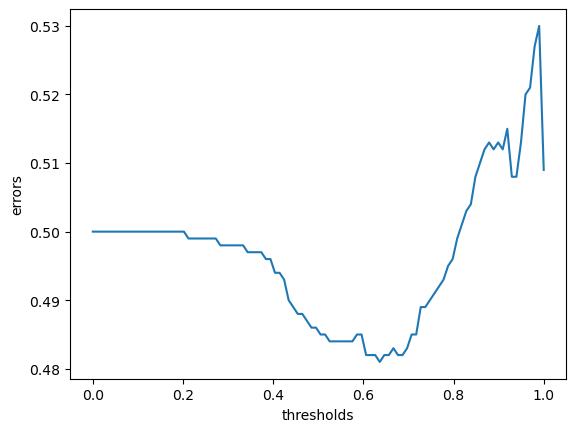

In [58]:
# Solution
# Function to compute error rate vs threshold
# clf is classification method
def error_vs_threshold(clf, X, y):
     thresholds = np.linspace(0, 1, 100)
     probs = clf.predict_proba(X)[:, 1]
     errors = [1 - accuracy_score(y, probs >= t) for t in thresholds]
     return thresholds, errors
thresholds, errors = error_vs_threshold(QDA_model,X_linear,y_linear)
plt.plot(thresholds, errors)
plt.xlabel("thresholds")
plt.ylabel("errors")


=== Logistic data ===
LDA accuracy (0.5 threshold): 0.688
QDA accuracy (0.5 threshold): 0.804
Naive Bayes accuracy (0.5 threshold): 0.668
Logistic Regression accuracy (0.5 threshold): 0.688


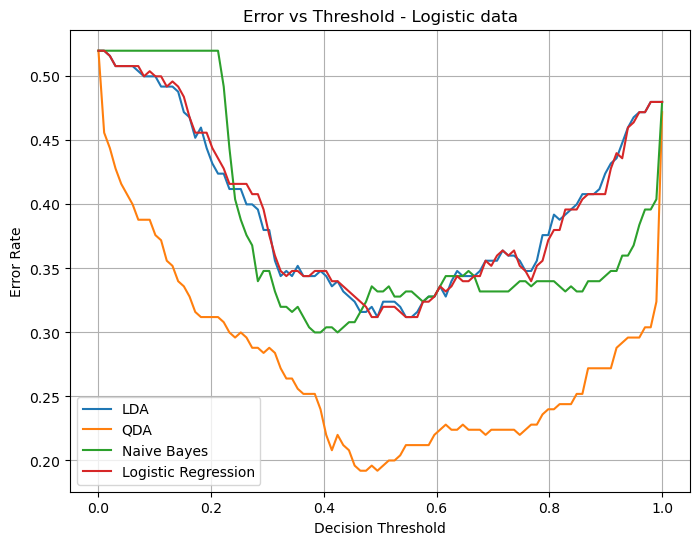


=== Linear data ===
LDA accuracy (0.5 threshold): 0.980
QDA accuracy (0.5 threshold): 0.988
Naive Bayes accuracy (0.5 threshold): 0.968
Logistic Regression accuracy (0.5 threshold): 0.984


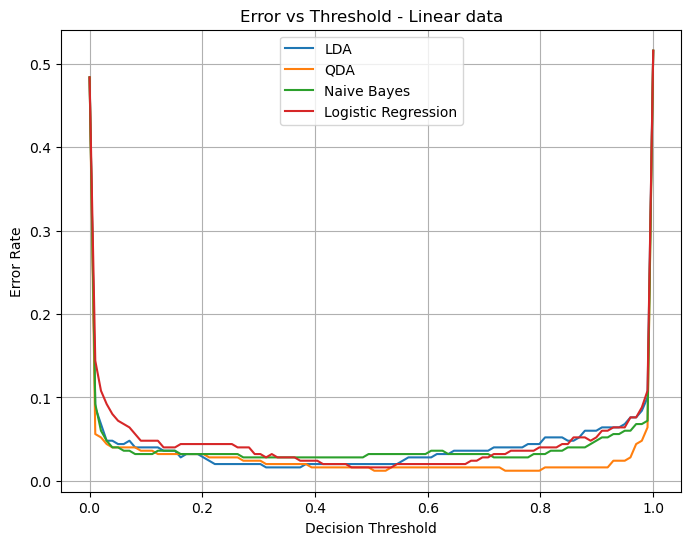


=== Quadratic data ===
LDA accuracy (0.5 threshold): 0.620
QDA accuracy (0.5 threshold): 0.980
Naive Bayes accuracy (0.5 threshold): 0.980
Logistic Regression accuracy (0.5 threshold): 0.620


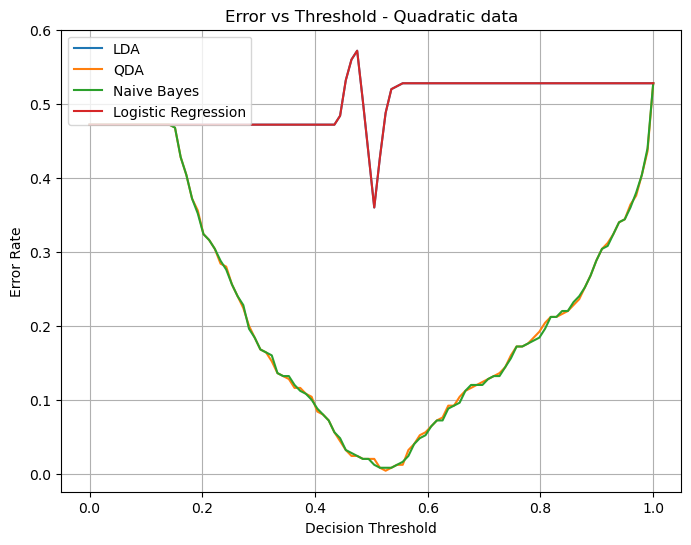


=== Gaussian blobs ===
LDA accuracy (0.5 threshold): 0.820
QDA accuracy (0.5 threshold): 0.832
Naive Bayes accuracy (0.5 threshold): 0.824
Logistic Regression accuracy (0.5 threshold): 0.820


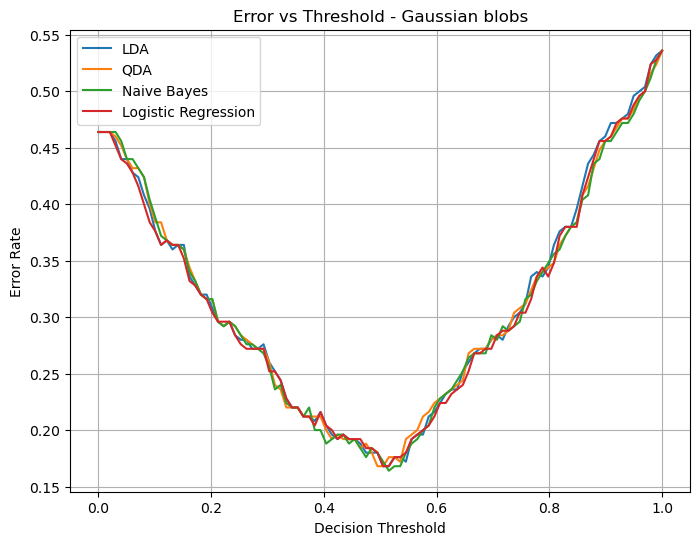

In [61]:
models = {
    "LDA": LDA(),
    "QDA": QDA(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression()
}

# Your datasets
datasets = {
    "Logistic data": (X_logistic, y_logistic),
    "Linear data": (X_linear, y_linear),
    "Quadratic data": (X_quadratic, y_quadratic),
    "Gaussian blobs": (X_gaussian, y_gaussian)
}

results = {}
for dataset_name, (X, y) in datasets.items():
    print(f"\n=== {dataset_name} ===")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    plt.figure(figsize=(8,6))
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        
        # Compute error vs threshold
        thresholds, errors = error_vs_threshold(model, X_test, y_test)
        
        # Plot
        plt.plot(thresholds, errors, label=model_name)
        
        # Optional: print accuracy at default threshold 0.5
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"{model_name} accuracy (0.5 threshold): {acc:.3f}")
    
    plt.xlabel("Decision Threshold")
    plt.ylabel("Error Rate")
    plt.title(f"Error vs Threshold - {dataset_name}")
    plt.grid(True)
    plt.legend()
    plt.show()